In [2]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
import Plotting
import Tools
from joblib import dump, load

In [3]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [4]:
df = pd.read_csv("train.csv")

In [5]:
names = df.columns.values

In [6]:
for i in range(len(names)):
    print(i,names[i])

0 Unnamed: 0
1 EventId
2 DER_mass_MMC
3 DER_mass_transverse_met_lep
4 DER_mass_vis
5 DER_pt_h
6 DER_deltaeta_jet_jet
7 DER_mass_jet_jet
8 DER_prodeta_jet_jet
9 DER_deltar_tau_lep
10 DER_pt_tot
11 DER_sum_pt
12 DER_pt_ratio_lep_tau
13 DER_met_phi_centrality
14 DER_lep_eta_centrality
15 PRI_tau_pt
16 PRI_tau_eta
17 PRI_tau_phi
18 PRI_lep_pt
19 PRI_lep_eta
20 PRI_lep_phi
21 PRI_met
22 PRI_met_phi
23 PRI_met_sumet
24 PRI_jet_num
25 PRI_jet_leading_pt
26 PRI_jet_leading_eta
27 PRI_jet_leading_phi
28 PRI_jet_subleading_pt
29 PRI_jet_subleading_eta
30 PRI_jet_subleading_phi
31 PRI_jet_all_pt
32 Weight
33 Label


In [7]:
df.head()

,Unnamed: 0,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,590565,690565,-999.000,64.859,42.315,59.059,-999.000,-999.000,-999.000,1.290,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,0.548086,b
1,608447,708447,108.602,6.181,56.082,88.179,4.369,370.238,-4.561,2.260,...,2,48.391,-1.725,-2.066,36.694,2.644,-1.654,85.085,0.021757,b
2,804116,904116,123.001,14.189,92.511,42.066,-999.000,-999.000,-999.000,2.986,...,1,41.726,-4.037,1.471,-999.000,-999.000,-999.000,41.726,0.005721,s
3,726768,826768,95.702,12.679,61.994,18.992,2.710,256.832,-1.541,2.653,...,2,76.361,-1.899,-0.665,49.944,0.811,2.647,126.305,0.000461,s
4,3747,103747,121.790,10.574,90.134,1.104,-999.000,-999.000,-999.000,3.200,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,1.356331,b


In [8]:
PRIMITIVE = np.loadtxt('train.csv',
                        delimiter=',',
                        comments='#',
                        skiprows=1,
                        usecols=[15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])

In [9]:
PRIMITIVE

array([[ 4.3873e+01, -5.8100e-01,  1.7000e-01, ..., -9.9900e+02,
        -9.9900e+02,  0.0000e+00],
       [ 2.2494e+01,  2.0370e+00,  2.0790e+00, ...,  2.6440e+00,
        -1.6540e+00,  8.5085e+01],
       [ 2.1095e+01, -1.8130e+00,  2.7980e+00, ..., -9.9900e+02,
        -9.9900e+02,  4.1726e+01],
       ...,
       [ 2.0051e+01,  3.2100e-01,  1.1050e+00, ..., -9.9900e+02,
        -9.9900e+02,  0.0000e+00],
       [ 4.2442e+01, -1.7280e+00, -1.3200e+00, ...,  1.0340e+00,
         9.7000e-01,  1.2276e+02],
       [ 5.3348e+01,  6.0000e-03, -3.3000e-01, ..., -9.9900e+02,
        -9.9900e+02,  3.7591e+01]])

In [10]:
Label = df['Label']
label = []
for i in range(len(Label)):
    if Label[i]=='s':
        label.append(1)
    else:
        label.append(0)

In [11]:
len(label),len(Label)

(157511, 157511)

In [12]:
lab = np.array(label)

In [14]:
#prim_train.shape

In [27]:
prim_train,prim_test, lab_train, lab_test = train_test_split(PRIMITIVE, lab, test_size=0.2)

In [29]:
print("training sample size: ",len(prim_train))
print("test sample size: ",len(prim_test))
print("train + test = ", len(prim_train)+len(prim_test))
print("train / sample =", round(float(len(prim_train))/float(len(PRIMITIVE)),1))
print("test / sample =", round(float(len(prim_test))/float(len(PRIMITIVE)),1))

training sample size:  126008
test sample size:  31503
train + test =  157511
train / sample = 0.8
test / sample = 0.2


In [22]:
#create a network with 4 layers
model = Sequential()
model.add(Dense(20,input_dim=17,activation='sigmoid'))
#model.add(Dense(15,activation='relu'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [23]:
#compiling the model before running it
model.compile(loss='mean_absolute_error', optimizer='adam')

In [24]:
#training
model.fit(PRIMITIVE,lab,epochs=10,batch_size=15)

Epoch 1/10
157511/157511 [==============================] - 10s 62us/step - loss: 0.3407
Epoch 2/10
157511/157511 [==============================] - 10s 61us/step - loss: 0.3210 1s - loss: - ETA: 1s -  - ETA: 
Epoch 3/10
157511/157511 [==============================] - 9s 60us/step - loss: 0.3194
Epoch 4/10
157511/157511 [==============================] - 10s 63us/step - loss: 0.3180 - ET - ETA: 4s - loss: 0.31 - ETA: 4s - loss - ET - ETA: 3s - - ETA: 1s - loss: 0.318 - ETA: 1s - los - ETA: 0s -
Epoch 5/10
157511/157511 [==============================] - 10s 62us/step - loss: 0.3179 4s - loss: 0.31 - ETA: 4s - loss:  
Epoch 6/10
157511/157511 [==============================] - 10s 60us/step - loss: 0.3168 7s - - ETA: 7s - loss: 0.317 -  - ETA: 5s - loss: 0 - ETA: 5s - loss: 0.317 - ET - ETA: 4s - loss: 0.3 - ETA:  - ETA
Epoch 7/10
157511/157511 [==============================] - 9s 60us/step - loss: 0.3168
Epoch 8/10
157511/157511 [==============================] - 10s 60us/step - loss

In [84]:
lab_predict = model.predict(prim_test)

In [85]:
len(lab_predict),len(lab_test)

(31503, 31503)

In [86]:
plt.plot(lab_predict,lab_test,".")
plt.show()

<IPython.core.display.Javascript object>


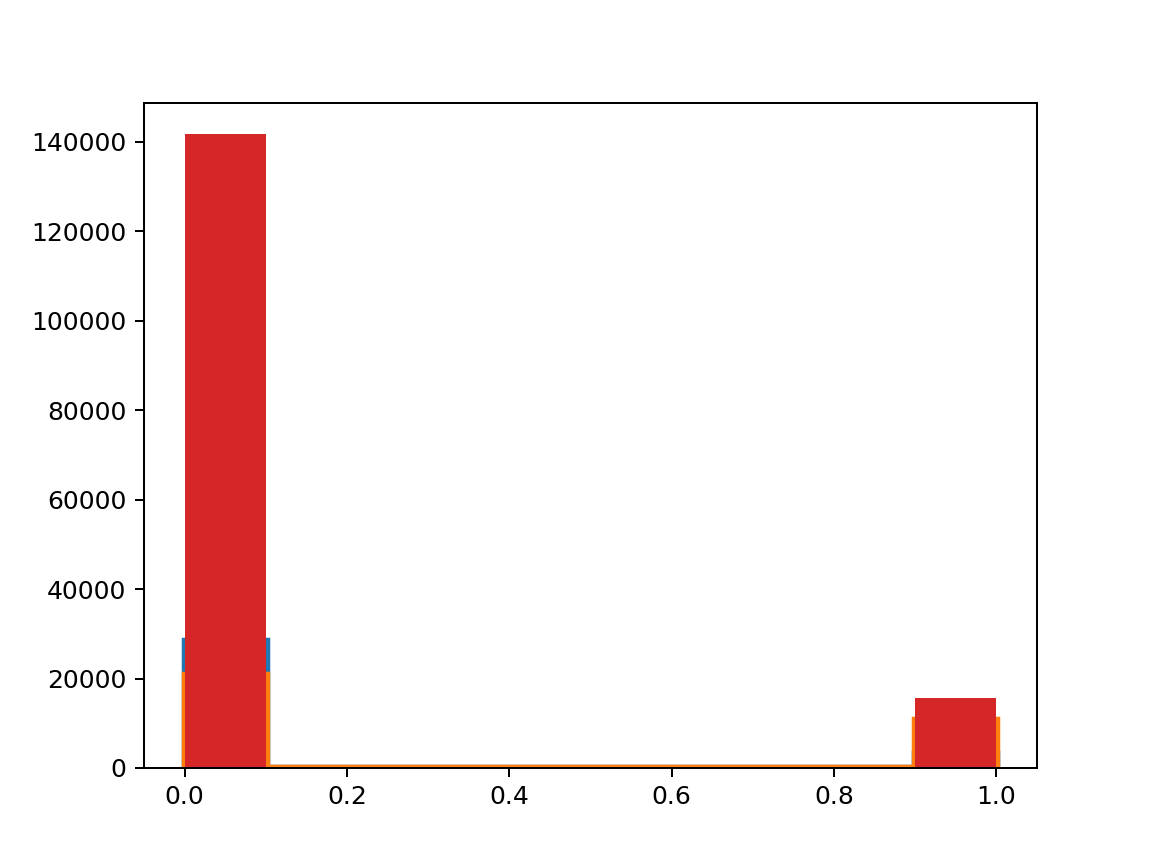

(array([20780.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10723.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 1 Patch objects>)

In [87]:
plt.hist(lab_predict,histtype='step',lw=3)
plt.hist(lab_test,histtype='step',lw=3)

In [67]:
counts_good=0
counts_false=0
for i in range(len(lab_predict)):
    if lab_predict[i]==lab_test[i]:
        counts_good+=1
    else:
        counts_false+=1

In [88]:
counts_good

15815

In [89]:
counts_false

15688

In [90]:
counts_good/len(lab_predict)

0.5020156810462496

In [91]:
counts_false/len(lab_predict)

0.49798431895375045

In [93]:
lab_predict_all = model.predict(PRIMITIVE)

<IPython.core.display.Javascript object>


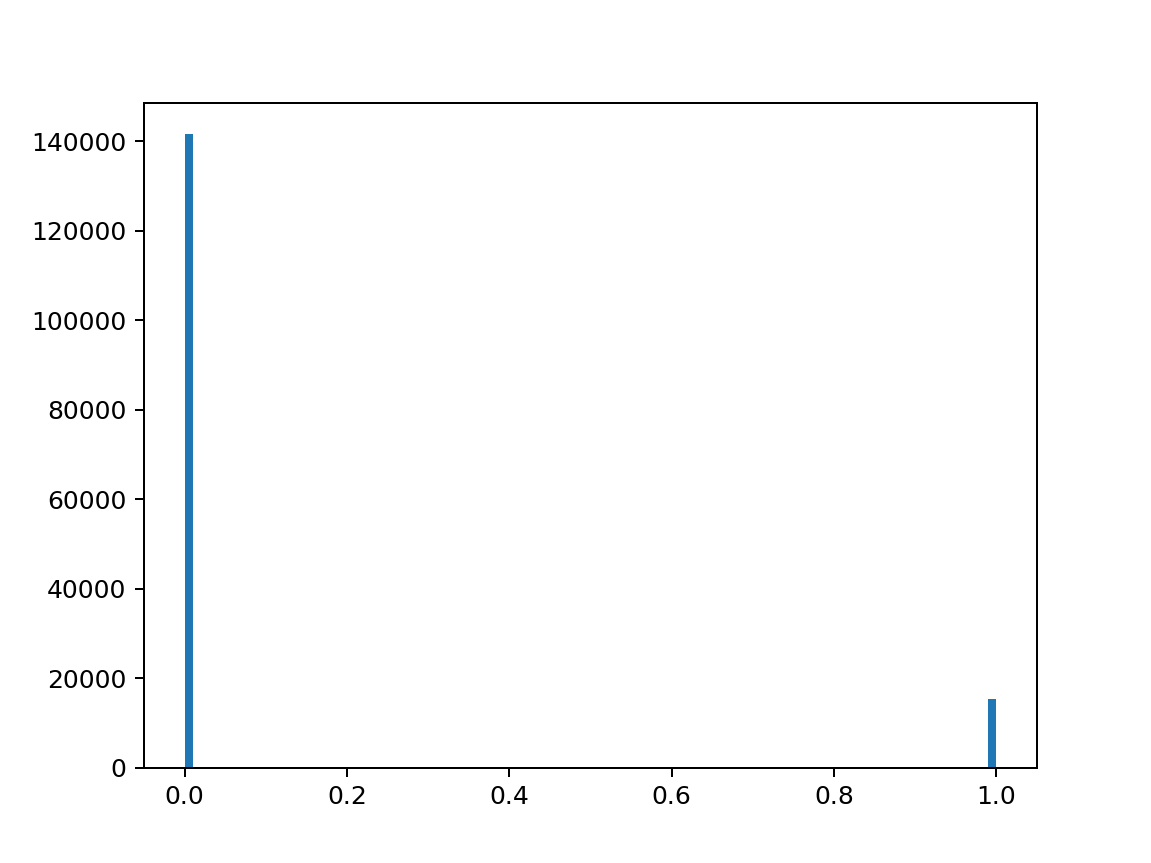

In [100]:
plt.hist(lab_predict_all,bins=100)
plt.show()

In [96]:
np.median(lab_predict_all)

1.7881393e-07

In [101]:
np.unique(lab_predict_all)

array([0.0000000e+00, 2.9802322e-08, 5.9604645e-08, ..., 9.9999976e-01,
       9.9999982e-01, 9.9999988e-01], dtype=float32)

In [94]:
len(lab_predict_all),len(Label)

(157511, 157511)

In [102]:
s = []
for i in range(len(lab_predict_all)):
    if lab_predict_all[i]<0.5:
        s.append('b')
    else:
        s.append('s')
        
lab_predict_all_str = np.array(s)

In [104]:
np.unique(lab_predict_all_str)

array(['b', 's'], dtype='<U1')

In [116]:
rank = []
counts_s = 1
counts_b = 1
for i in range(len(lab_predict_all_str)):
    if lab_predict_all_str[i]=='s':
        rank.append(counts_s)
        counts_s += 1
    else:
        rank.append(counts_b)
        counts_b += 1

In [117]:
len(rank)

157511

In [118]:
rank = np.array(rank)

In [ ]:
EventId = df['EventId']

In [119]:
d = {'EventId': df['EventId'],'RankEvent': rank, 'Prediction': lab_predict_all_str}

In [120]:
DF = pd.DataFrame(data=d)

In [ ]:
df.sort_values(by=['col1'])

In [123]:
DF.sort_values(by=['Prediction'],ascending=False)


,EventId,RankEvent,Prediction
36739,385591,3654,s
143141,695939,14279,s
54279,159651,5464,s
125637,324336,12551,s
35367,610901,3492,s
94573,771330,9569,s
143138,793465,14277,s
15914,668419,1542,s
143140,282961,14278,s
70055,731445,7115,s


In [124]:
DF.to_csv("../ prediction_keras.csv",index=None)

In [125]:
!pwd

/home/jovyan/HiggsML


In [ ]:
np.savetxt("results_keras.txt",np.array([]).T)

In [25]:
PRIMITIVE_TEST = np.loadtxt('test.csv',
                        delimiter=',',
                        comments='#',
                        skiprows=1,
                        usecols=[15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])

In [26]:
LAB_PREDICT = model.predict(PRIMITIVE_TEST)

In [27]:
s = []
for i in range(len(LAB_PREDICT)):
    if LAB_PREDICT[i]<0.5:
        s.append('b')
    else:
        s.append('s')
        
lab_predict_all_str = np.array(s)

In [28]:
rank = []
counts_s = 1
counts_b = 1
for i in range(len(lab_predict_all_str)):
    if lab_predict_all_str[i]=='s':
        rank.append(counts_s)
        counts_s += 1
    else:
        rank.append(counts_b)
        counts_b += 1

In [29]:
rank = np.array(rank)

In [30]:
df_test = pd.read_csv("test.csv")

In [ ]:
df_test['EventId']

In [ ]:
len

In [44]:
#d_test = {'EventId': df_test['EventId'],'RankEvent': rank, 'Prediction': lab_predict_all_str}
d_test = {'EventId': df_test['EventId'],'RankEvent': ii, 'Prediction': lab_predict_all_str}

In [45]:
DF_TEST = pd.DataFrame(data=d_test)

In [46]:
DF_TEST

,EventId,RankEvent,Prediction
0,729527,0.0,b
1,448044,1.0,b
2,619130,2.0,b
3,661298,3.0,b
4,357875,4.0,b
5,395334,5.0,b
6,240842,6.0,s
7,412858,7.0,b
8,485452,8.0,b
9,305217,9.0,b


In [79]:
ii = np.zeros(len(df_val['EventId']))
for i in range(len(df_val['EventId'])):
    ii[i] = i+1

In [63]:
len(ii)

292520

In [48]:
DF_TEST.sort_values(by=['Prediction'],ascending=False)

,EventId,RankEvent,Prediction
368206,661282,368206.0,s
87096,761323,87096.0,s
87108,465114,87108.0,s
87109,359171,87109.0,s
290711,244605,290711.0,s
87114,291505,87114.0,s
87117,265990,87117.0,s
290705,566078,290705.0,s
87122,774790,87122.0,s
290703,582512,290703.0,s


In [42]:
DF_TEST.to_csv("./meirin/HiggsML/prediction_keras_test.csv",index=None)

In [52]:
len(np.unique(DF_TEST['RankEvent']))

368207

In [53]:
len(DF_TEST)

368207

In [54]:
PRIMITIVE_VAL = np.loadtxt('validation.csv',
                        delimiter=',',
                        comments='#',
                        skiprows=1,
                        usecols=[15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])

In [56]:
LAB_VAL = model.predict(PRIMITIVE_VAL)

In [64]:
s = []
for i in range(len(LAB_VAL)):
    if LAB_VAL[i]<0.5:
        s.append('b')
    else:
        s.append('s')
        
lab_predict_all_str = np.array(s)

In [58]:
df_val = pd.read_csv("validation.csv")

In [ ]:
df_val['EventId']

In [97]:
d_val = {'EventId': df_val['EventId'],'RankOrder': ii, 'Label': lab_predict_all_str}

In [98]:
DF_VAL = pd.DataFrame(data=d_val)

In [99]:
#DF_VAL = DF_VAL.sort_values(by=['RankOrder'],ascending=True)

In [100]:
DF_VAL = DF_VAL.sort_values(by=['Label'],ascending=False)

In [101]:
DF_VAL['RankOrder'] = ii

In [102]:
DF_VAL['RankOrder']

120591         1.0
119341         2.0
186481         3.0
119350         4.0
44764          5.0
            ...   
103321    292516.0
103322    292517.0
103323    292518.0
103324    292519.0
292519    292520.0
Name: RankOrder, Length: 292520, dtype: float64

In [103]:
DF_VAL.to_csv("./meirin/HiggsML/prediction_keras_val.csv",index=None)

In [104]:
len(DF_VAL)

292520

In [105]:
2*2

4